### Third normal form schema I developed based off several datasets, provided by my database class.
All of the following names/addresses have been made up.
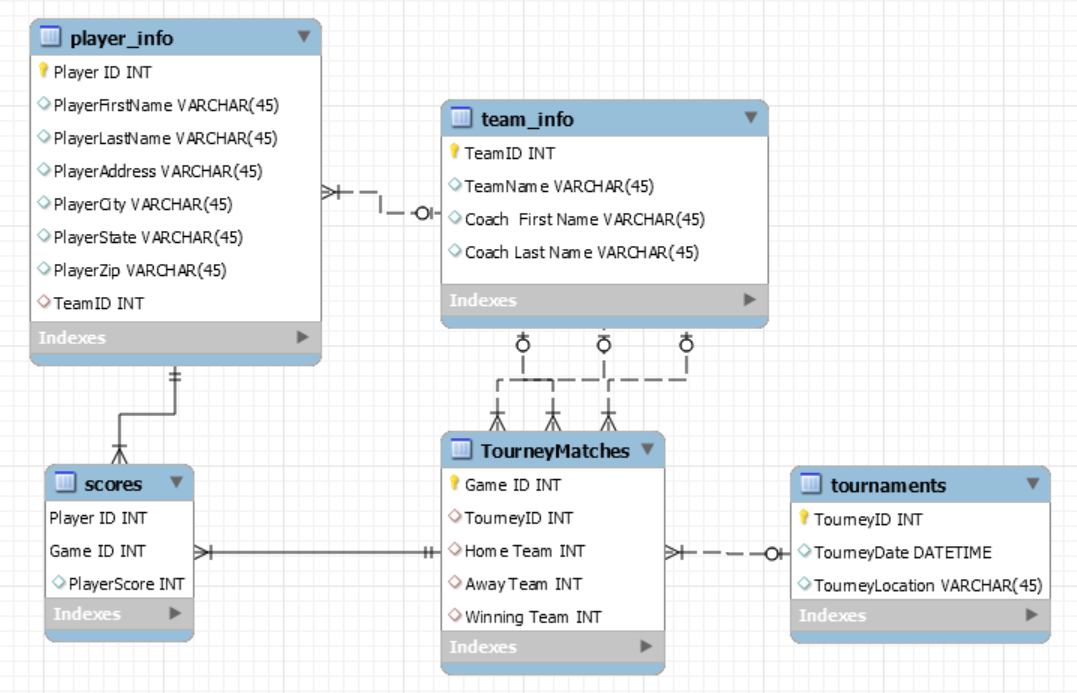

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="bball tourney"
)

mycursor = mydb.cursor() 

In [2]:
# Display all players and their address formatted suitably for a mailing list, sorted by zip code
       
mycursor.execute('SELECT CONCAT(PlayerFirstname," ",playerlastname) name,  \
CONCAT(playeraddress,", ",playercity,", ",playerstate," ",playerzip) address \
FROM `bball tourney`.player_info ORDER BY playerzip;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('Kathryn Patterson', '16 Maple Lane, Auburn, WA 98002')
('Ann Patterson', '16 Maple Lane, Auburn, WA 98002')
('Neil Patterson', '16 Maple Lane, Auburn, WA 98002')
('Bill Peterson', '603 Connection, Frisco, WA 98002')
('Steve Smity', '160 Elm Street, Auburn, WA 98002')
('Rachel Patterson', '16 Maple Lane, Auburn, WA 98002')
('Megan Patterson', '16 Maple Lane, Auburn, WA 98002')
('Carol Viescas', '16345 NE 32nd Street, Bellevue, WA 98004')
('Richard Sheskey', '17950 N 59th, Seattle, WA 98011')
('Sara Sheskey', '17950 N 59th, Seattle, WA 98011')
('Sarah Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('William Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('Mary Thompson', '122 Spring Valley Drive, Duvall, WA 98019')
('Michael Hernandez', '47 Harvard Drive, Kirkland, WA 98033')
('Steve Pundt', '722 Moss Bay Blvd., Kirkland, WA 98033')
('Josey Lane', '227  Bay Moss, Kandy, WA 98033')
('Kendra Hernandez', '47 Harvard Drive, Kirkland, WA 98033')
('Kevin Murray', '154 Oklah

In [3]:
# Show tournament IDs that have not been played yet

mycursor.execute('SELECT tourneyid FROM tournaments \
WHERE NOT EXISTS ( \
SELECT * FROM tourneymatches WHERE \
tournaments.tourneyid = tourneymatches.tourneyid);'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(18,)
(19,)


In [4]:
# Display the names of the top 10 scorers along with their total score

mycursor.execute('SELECT playerfirstname, playerlastname, SUM(PlayerScore) AS total_score  \
FROM scores JOIN player_info On scores.playerID = player_info.playerID \
GROUP BY scores.playerID ORDER BY total_score DESC LIMIT 10;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('John', 'Kennedy', Decimal('267'))
('Sarah', 'Thompson', Decimal('258'))
('David', 'Viescas', Decimal('245'))
('Kathryn', 'Patterson', Decimal('244'))
('Neil', 'Patterson', Decimal('234'))
('Steve', 'Pundt', Decimal('233'))
('Caleb', 'Viescas', Decimal('230'))
('Rachel', 'Patterson', Decimal('225'))
('David', 'Cunningham', Decimal('206'))
('Mary', 'Thompson', Decimal('200'))


In [5]:
# Display players’ names along with their highest score 

mycursor.execute('SELECT playerfirstname, playerlastname, MAX(PlayerScore) AS high_score \
FROM scores JOIN player_info On scores.playerID = player_info.playerID \
GROUP BY scores.playerID;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('Barbara', 'Fournier', 21)
('David', 'Fournier', 50)
('John', 'Kennedy', 66)
('Sara', 'Sheskey', 21)
('Ann', 'Patterson', 39)
('Neil', 'Patterson', 54)
('David', 'Viescas', 56)
('Stephanie', 'Viescas', 25)
('Alastair', 'Black', 22)
('David', 'Cunningham', 50)
('Angel', 'Kennedy', 43)
('Carol', 'Viescas', 22)
('Elizabeth', 'Hallmark', 39)
('Gary', 'Hallmark', 50)
('Kathryn', 'Patterson', 55)
('Richard', 'Sheskey', 24)
('Kendra', 'Hernandez', 39)
('Michael', 'Hernandez', 51)
('John', 'Viescas', 64)
('Suzanne', 'Viescas', 24)
('Zachary', 'Ehrlich', 34)
('Alaina', 'Hallmark', 48)
('Caleb', 'Viescas', 68)
('Sarah', 'Thompson', 48)
('Megan', 'Patterson', 32)
('Mary', 'Thompson', 55)
('William', 'Thompson', 42)
('Michael', 'Viescas', 25)
('Bailey', 'Hallmark', 34)
('Rachel', 'Patterson', 54)
('Steve', 'Pundt', 52)
('Joe', 'Rosales', 23)


In [7]:
# List the player (names) whose highest score in a game is more than 10 points higher than the overall average.  

mycursor.execute('SELECT playerfirstname, playerlastname, MAX(PlayerScore) AS high_score \
FROM scores JOIN player_info On scores.playerID = player_info.playerID \
GROUP BY scores.playerID \
HAVING high_score > (10 + (SELECT AVG(PlayerScore) FROM scores));'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('David', 'Fournier', 50)
('John', 'Kennedy', 66)
('Ann', 'Patterson', 39)
('Neil', 'Patterson', 54)
('David', 'Viescas', 56)
('David', 'Cunningham', 50)
('Angel', 'Kennedy', 43)
('Elizabeth', 'Hallmark', 39)
('Gary', 'Hallmark', 50)
('Kathryn', 'Patterson', 55)
('Kendra', 'Hernandez', 39)
('Michael', 'Hernandez', 51)
('John', 'Viescas', 64)
('Alaina', 'Hallmark', 48)
('Caleb', 'Viescas', 68)
('Sarah', 'Thompson', 48)
('Mary', 'Thompson', 55)
('William', 'Thompson', 42)
('Rachel', 'Patterson', 54)
('Steve', 'Pundt', 52)


In [6]:
# Find the average score across all players/games.  

mycursor.execute('SELECT AVG(PlayerScore) FROM scores'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(Decimal('28.2240'),)


In [8]:
# List the player names whose highest score in a game is more than 10 points higher than their PERSONAL average.
# Also, return their highest score and personal average (rounded to 2 decimal places)

mycursor.execute('SELECT playerfirstname, playerlastname, MAX(PlayerScore) AS high_score, \
ROUND(AVG(PlayerScore), 2) AS personal_avg FROM scores AS X \
JOIN player_info On X.playerID = player_info.playerID \
GROUP BY X.playerID \
HAVING high_score > (10 + (SELECT AVG(PlayerScore) FROM scores AS Y WHERE X.playerID = Y.playerID));'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)


('David', 'Fournier', 50, Decimal('27.33'))
('John', 'Kennedy', 66, Decimal('44.50'))
('Ann', 'Patterson', 39, Decimal('26.00'))
('Neil', 'Patterson', 54, Decimal('39.00'))
('David', 'Viescas', 56, Decimal('40.83'))
('David', 'Cunningham', 50, Decimal('34.33'))
('Angel', 'Kennedy', 43, Decimal('29.00'))
('Elizabeth', 'Hallmark', 39, Decimal('28.17'))
('Gary', 'Hallmark', 50, Decimal('31.17'))
('Kathryn', 'Patterson', 55, Decimal('40.67'))
('Kendra', 'Hernandez', 39, Decimal('22.83'))
('Michael', 'Hernandez', 51, Decimal('32.00'))
('John', 'Viescas', 64, Decimal('31.83'))
('Alaina', 'Hallmark', 48, Decimal('27.83'))
('Caleb', 'Viescas', 68, Decimal('38.33'))
('Mary', 'Thompson', 55, Decimal('33.33'))
('William', 'Thompson', 42, Decimal('24.83'))
('Bailey', 'Hallmark', 34, Decimal('18.33'))
('Rachel', 'Patterson', 54, Decimal('37.50'))
('Steve', 'Pundt', 52, Decimal('38.83'))


### Now, we will perform more queries using a different schema.
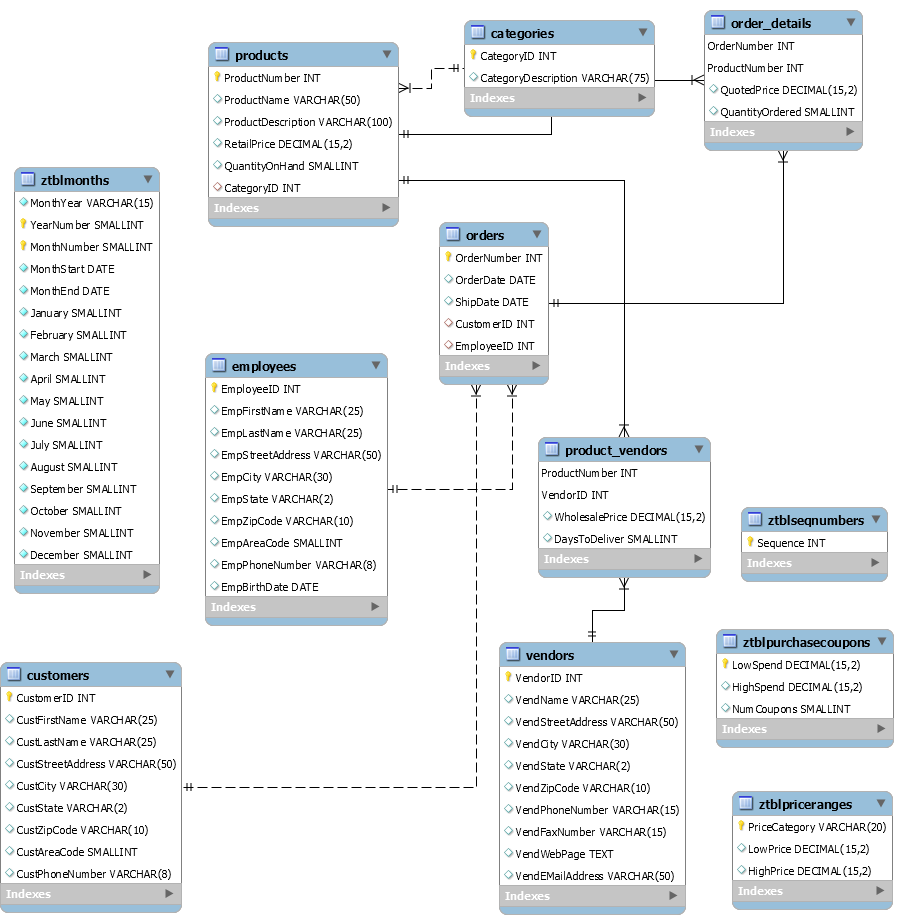

In [9]:
 mycursor.execute("USE salesorders;"
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

In [10]:
# Return order numbers that are 1 digit long.
# Also return the customers' name and the product name from the order

mycursor.execute('SELECT orders.ordernumber, custfirstname, custlastname, ProductName \
FROM customers \
JOIN orders ON customers.CustomerID = orders.CustomerID \
JOIN order_details ON orders.OrderNumber = order_details.OrderNumber \
JOIN products ON order_details.ProductNumber = products.ProductNumber \
WHERE LENGTH(orders.ordernumber) = 1;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(2, 'Suzanne', 'Viescas', 'X-Pro All Weather Tires')
(2, 'Suzanne', 'Viescas', 'Ultimate Export 2G Car Rack')
(7, 'Suzanne', 'Viescas', 'Eagle SA-120 Clipless Pedals')
(7, 'Suzanne', 'Viescas', 'X-Pro All Weather Tires')
(3, 'William', 'Thompson', 'Trek 9000 Mountain Bike')
(3, 'William', 'Thompson', 'Viscount Mountain Bike')
(3, 'William', 'Thompson', 'GT RTS-2 Mountain Bike')
(3, 'William', 'Thompson', 'ProFormance ATB All-Terrain Pedal')
(3, 'William', 'Thompson', 'Dog Ear Aero-Flow Floor Pump')
(3, 'William', 'Thompson', 'Glide-O-Matic Cycling Helmet')
(3, 'William', 'Thompson', 'True Grip Competition Gloves')
(3, 'William', 'Thompson', 'Cosmic Elite Road Warrior Wheels')
(8, 'Gary', 'Hallmark', 'ProFormance ATB All-Terrain Pedal')
(8, 'Gary', 'Hallmark', "Pro-Sport 'Dillo Shades")
(8, 'Gary', 'Hallmark', 'Turbo Twin Tires')
(8, 'Gary', 'Hallmark', 'TransPort Bicycle Rack')
(8, 'Gary', 'Hallmark', 'Ultimate Export 2G Car Rack')
(9, 'Mariya', 'Sergienko', 'StaDry Cycling Pants')
(4,

In [11]:
# Find orders from 4th quarter 2012 that took 4 or more days to ship.
# Additionally, order the results by state then city, and leave out orders from WA 


mycursor.execute('SELECT shipdate - orderdate AS shiplag, \
custcity, custstate FROM orders JOIN customers \
ON orders.CustomerID = customers.CustomerID \
WHERE orderdate >= "2012-10-01" AND orderdate < "2013-01-01" \
AND custstate != "WA" HAVING shiplag >= 4 \
ORDER BY custstate, custcity;'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(73, 'Chico', 'CA')
(8872, 'Chico', 'CA')
(4, 'Fremont', 'CA')
(4, 'Fremont', 'CA')
(8873, 'Fremont', 'CA')
(4, 'Glendale', 'CA')
(4, 'Glendale', 'CA')
(4, 'Glendale', 'CA')
(4, 'Long Beach', 'CA')
(4, 'Palm Springs', 'CA')
(4, 'Palm Springs', 'CA')
(4, 'San Diego', 'CA')
(4, 'San Diego', 'CA')
(8870, 'San Diego', 'CA')
(72, 'San Diego', 'CA')
(4, 'San Diego', 'CA')
(73, 'San Diego', 'CA')
(70, 'San Diego', 'CA')
(4, 'San Diego', 'CA')
(4, 'Medford', 'OR')
(4, 'Medford', 'OR')
(4, 'Medford', 'OR')
(4, 'Portland', 'OR')
(4, 'Portland', 'OR')
(4, 'Portland', 'OR')
(4, 'Portland', 'OR')
(71, 'Portland', 'OR')
(4, 'Portland', 'OR')
(74, 'Portland', 'OR')
(4, 'Salem', 'OR')
(4, 'Salem', 'OR')
(4, 'Salem', 'OR')
(72, 'Austin', 'TX')
(4, 'Austin', 'TX')
(4, 'Austin', 'TX')
(4, 'Austin', 'TX')
(4, 'Austin', 'TX')
(74, 'Austin', 'TX')
(4, 'Dallas', 'TX')
(4, 'Dallas', 'TX')
(73, 'Dallas', 'TX')
(4, 'Dallas', 'TX')
(4, 'Dallas', 'TX')
(4, 'El Paso', 'TX')
(4, 'El Paso', 'TX')
(71, 'El Paso', 'TX

In [12]:
# List the CUSTOMERS who have purchased a bike but not a helmet      

mycursor.execute("SELECT distinct concat(CustFirstName,' ', CustLastName) NAME \
FROM customers WHERE customers.CustomerID IN ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details \
on orders.OrderNumber = order_details.OrderNumber join products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 2) and customers.CustomerID NOT IN ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID JOIN order_details \
on orders.OrderNumber = order_details.OrderNumber JOIN products \
on order_details.ProductNumber = products.ProductNumber WHERE \
ProductName LIKE '%HELMET');"
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('Alaina Hallmark',)
('Julia Schnebly',)


In [13]:
#Show the customer ORDERS that have a bike but do not have a helmet

mycursor.execute("SELECT DISTINCT ordernumber FROM order_details AS X \
JOIN products on X.ProductNumber = products.ProductNumber \
WHERE categoryID = 2 AND NOT EXISTS ( \
SELECT * FROM order_details AS Y \
JOIN products on Y.ProductNumber = products.ProductNumber \
WHERE ProductName LIKE '%HELMET' AND \
X.ordernumber = y.ordernumber) LIMIT 10;" #I limited to 10 orders for the sake of space
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(5,)
(10,)
(13,)
(14,)
(15,)
(20,)
(22,)
(23,)
(25,)
(26,)


In [14]:
# Display the customers and their orders that have a bike and a helmet in the same order

mycursor.execute("SELECT CustFirstName, CustLastName, X.OrderNumber \
FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details AS X \
on orders.OrderNumber = X.OrderNumber join products \
on X.ProductNumber = products.ProductNumber  \
WHERE categoryID = 2 AND EXISTS ( \
SELECT * FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details AS Y \
on orders.OrderNumber = Y.OrderNumber join products \
on Y.ProductNumber = products.ProductNumber  \
WHERE ProductName LIKE '%HELMET' \
AND X.ordernumber = y.ordernumber) LIMIT 10;" #I limited to 10 orders for the sake of space
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('David', 'Smith', 1)
('William', 'Thompson', 3)
('Andrew', 'Cencini', 4)
('Joyce', 'Bonnicksen', 11)
('Sam', 'Abolrous', 17)
('Luke', 'Patterson', 19)
('Sam', 'Abolrous', 27)
('Liz', 'Keyser', 32)
('Robert', 'Brown', 39)
('Dean', 'McCrae', 44)


In [15]:
# Display the customers who have never ordered bikes or tires

mycursor.execute("SELECT distinct concat(CustFirstName,' ',CustLastName) NAME \
FROM customers WHERE customers.CustomerID not in ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID join order_details \
on orders.OrderNumber = order_details.OrderNumber join products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 2) and customers.CustomerID NOT in ( \
SELECT customers.CustomerID FROM customers JOIN orders \
on customers.CustomerID = orders.CustomerID JOIN order_details \
on orders.OrderNumber = order_details.OrderNumber JOIN products \
on order_details.ProductNumber = products.ProductNumber WHERE \
categoryID = 6);"
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('Caleb Viescas',)
('Jeffrey Tirekicker',)


In [16]:
# Show the vendors (by ID) who sell accessories, car racks, and clothing. 
# CategoryID 1 = ACCESSORIES. CategoryID 3 = CLOTHING. CategoryID 5 = CAR RACKS

mycursor.execute('SELECT distinct vendors.VendorID \
FROM vendors JOIN product_vendors \
ON vendors.VendorID = product_vendors.VendorID JOIN products \
ON product_vendors.productnumber = products.productnumber WHERE \
CategoryID = "1" AND vendors.VendorID IN ( \
SELECT vendors.VendorID FROM vendors JOIN product_vendors \
ON vendors.VendorID = product_vendors.VendorID JOIN products \
ON product_vendors.productnumber = products.productnumber WHERE \
CategoryID = "3" AND vendors.VendorID IN ( \
SELECT vendors.VendorID FROM vendors JOIN product_vendors \
ON vendors.VendorID = product_vendors.VendorID JOIN products \
ON product_vendors.productnumber = products.productnumber WHERE \
CategoryID = "5"))'
)
                 
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(6,)
(7,)
(9,)


In [17]:
mycursor.close()

True